# Seaborn

## Гистограммы распределения признаков

[Seaborn](http://seaborn.pydata.org/index.html) — графическая библиотека с большими функциональными возможностями, позволяющая создавать разные типы графиков и использовать расширенные настройки при оформлении. Многие функции Seaborn интегрируются с библиотекой Matplotlib, что создает дополнительные возможности для творчества при визуализации данных.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_folder_path = './../../data'

df = pd.read_csv(os.path.join(data_folder_path, 'tips.csv'))
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


При использовании некоторых методов Seaborn система может выдавать **предупреждающие сообщения**, что метод применяется к определенному типу данных. Эти предупреждения не являются сообщениями об ошибках, их можно игнорировать и отключить выведение на экран:

In [3]:
import warnings; warnings.simplefilter('ignore')

Для построения **гистограммы распределения количественных признаков** в библиотеке Seaborn используется метод [distplot](http://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot). Перед применением метода установим стандартные параметры отображения графиков с помощью команды [sns.set()](http://seaborn.pydata.org/generated/seaborn.set.html?highlight=set#seaborn.set):

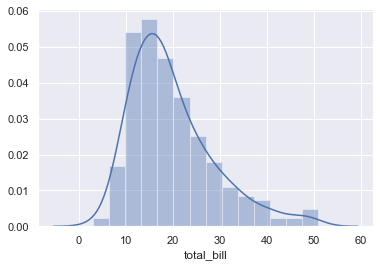

In [4]:
sns.set()
sns.distplot(df['total_bill'])

Seaborn позволяет разместить на одном графике гистограммы распределения двух признаков и показать связь между ними. Тип графика, используемый для этого, называется [jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot):

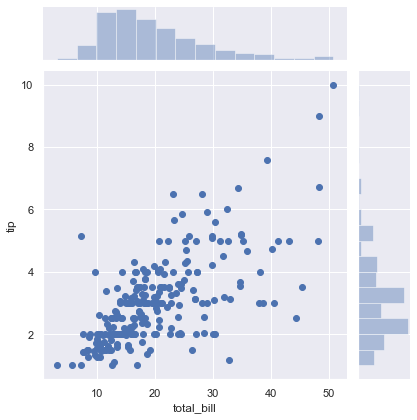

In [5]:
sns.jointplot(x='total_bill', y='tip', data=df)

Характер **представления информации** в центральной части графика можно регулировать с помощью параметра **kind**. Например, kind = 'reg' выводит на экран не только точки, представляющие данные об отдельных посещениях ресторана, но и линию регрессии, выражающую общий характер связи между двумя величинами:

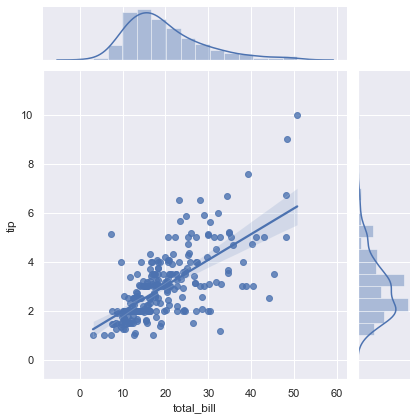

In [6]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='reg')